# Relax Engagement Challenge

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [16]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1', parse_dates=['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [18]:
users.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,0.432742,0.356432,124.056723,3383.761968
min,1.00000,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000


In [19]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [20]:
engage = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1', parse_dates=['time_stamp'])

In [21]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [22]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


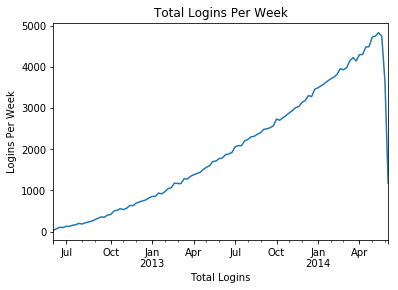

In [24]:
for_graph = engage.set_index('time_stamp').sort_index()
weekly_visits = for_graph.resample('1W').sum()['visited']
weekly_visits.plot()
_ = plt.xlabel('Total Logins')
_ = plt.ylabel('Logins Per Week')
_ = plt.title('Total Logins Per Week')
plt.show()

In [25]:
engage['week'] = engage['time_stamp'].dt.strftime('%Y-%U')

In [26]:
weeks = engage.groupby(['user_id', 'week']).size().reset_index().rename(columns={0:'count'})
weeks.head()

,user_id,week,count
0,1,2014-16,1
1,2,2013-45,1
2,2,2013-47,1
3,2,2013-49,1
4,2,2013-51,1


In [27]:
adopted = weeks.loc[weeks['count'] >= 3].user_id.unique()
print('Number of Adopted Users: {}'.format(len(adopted)))
print('Percentage of Adopted Users: {:.2f}%'.format(len(adopted)/users.shape[0]*100))

Number of Adopted Users: 1432
Percentage of Adopted Users: 11.93%


In [38]:
users['adopted'] = (users['object_id'].isin(adopted))
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null bool
domain                        12000 non-null object
org_size                      12000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [29]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


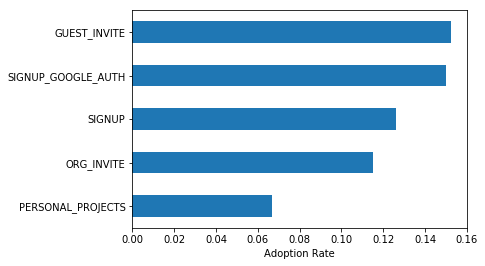

In [30]:
users.groupby('creation_source')['adopted'].mean().sort_values(0).plot(kind='barh')
plt.xlabel('Adoption Rate')
plt.ylabel('')
plt.show()

In [33]:
users['domain'] = users['email'].map(lambda x: x.split('@')[1])
random = (users.domain != 'gmail.com') & (users.domain != 'yahoo.com') & (users.domain != 'hotmail.com') & (users.domain != 'jourrapide.com') & (users.domain != 'gustr.com') & (users.domain != 'cuvox.de')
users.loc[random, 'domain'] = 'random website'
users['domain'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
random website    1186
gustr.com         1179
hotmail.com       1165
Name: domain, dtype: int64

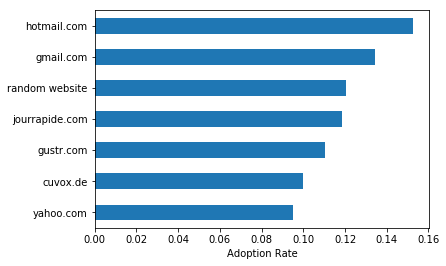

In [34]:
users.groupby(['domain'])['adopted'].mean().sort_values(0).plot(kind='barh')
plt.xlabel('Adoption Rate')
plt.ylabel('')
plt.show()

In [35]:
org_size = users.org_id.value_counts()
users['org_size'] = users.org_id.map(org_size)

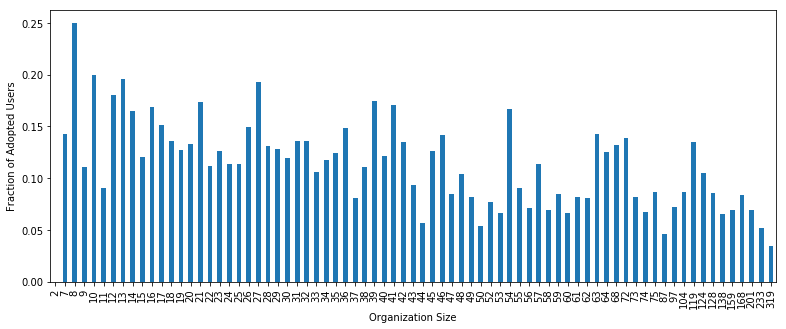

In [36]:
users.groupby('org_size')['adopted'].mean().plot(kind='bar', figsize=(13,5))
plt.xlabel('Organization Size')
plt.ylabel('Fraction of Adopted Users')
plt.show()

In [59]:
clean = users.drop(['name', 'email','domain'], axis=1)

# mapping creation source and adopted to integers
creation_key = {'PERSONAL_PROJECTS': 1,
            'GUEST_INVITE': 2,
            'ORG_INVITE': 3,
            'SIGNUP': 4,
            'SIGNUP_GOOGLE_AUTH': 5}
clean['creation_source'] = clean['creation_source'].map(lambda x: creation_key[x])

#clean['adopted'] = int(clean['adopted'] == 'true')

# fill '0' if not invited by anyone and drop null values
clean['invited_by_user_id'].fillna(0, inplace=True)
clean.dropna(axis=0, inplace=True)

# # string to datetime
# clean['last_session_creation_time'] = pd.to_datetime(clean['last_session_creation_time'])
# # creation time string to datetime
# clean['creation_time'] = pd.to_datetime(clean['creation_time'])

# create a column usage, and drop time columns, including those whose difference is < 0
clean['usage'] = clean['last_session_creation_time'] - clean['creation_time']
clean.drop(['creation_time', 'last_session_creation_time'], axis=1, inplace=True)
clean = clean[clean['usage'] >= timedelta(days=0)]

# convert back to unix timestamp
clean['usage'] = clean['usage'].map(lambda x: x.total_seconds())

df = clean

In [60]:
df.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,org_size,usage
0,1,2,1,0,11,10803.0,False,75,0.0
1,2,3,0,0,1,316.0,False,233,11750400.0
2,3,3,0,0,94,1525.0,False,32,0.0
3,4,2,0,0,1,5151.0,False,233,86400.0
4,5,2,0,0,193,5240.0,False,16,432000.0


In [61]:
y = df['adopted']
x = df.drop(['adopted'], axis=1)
scaler = MinMaxScaler()
scaler.fit(x)
scaler.fit_transform(x)

#split 80-20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [64]:
# confusion matrix
pd.crosstab(y_test, y_pred, rownames=['Actual Hit'], colnames=['Predicted Hit'])

Predicted Hit,False,True
Actual Hit,,
False,1441,38
True,43,243


In [65]:
tree.predict_proba(X_test)
# the model is very confident in its answer

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [68]:
print("{:30}{:3f}".format('F1 score', f1_score(y_test, y_pred)))
print("{:30}{:3f}".format('Test accuracy', accuracy_score(y_test, y_pred)))
# good enough score and accuracy

F1 score                      0.857143
Test accuracy                 0.954108


In [66]:
list(zip(X_train, tree.feature_importances_))

[('object_id', 0.036145953358961626),
 ('creation_source', 0.011492791931100791),
 ('opted_in_to_mailing_list', 0.0029160028634618016),
 ('enabled_for_marketing_drip', 0.00043344591214105347),
 ('org_id', 0.021109401015865739),
 ('invited_by_user_id', 0.025743082969833714),
 ('org_size', 0.031715448797728196),
 ('usage', 0.87044387315090688)]

See feature importance above to identify which factors predict future user adoption. Looks like usage is the biggest factor while everything else pales in comparison, especially "enabled_for_marketing_drip."